In [7]:
import pandas as pd
import os
import time
import tabulate as tab
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, recall_score, confusion_matrix, classification_report ,precision_score
from sklearn.ensemble import HistGradientBoostingClassifier

# import data
path = "/Users/lion/Documents/HPI11/ASEAI/programming/ase2024/exercise_02/data"
df = pd.read_csv(os.path.join(path, "answerList_data.csv"))

In [8]:
Y_TO_EXPLAIN = df['GroundTruth']
cols_to_drop = ['TP', 'FP', 'FN', 'TN', 'Answer.explanation', "Answer.ID", "Worker.ID", 'GroundTruth']
df = df.drop(columns=cols_to_drop)

In [9]:
# Encode categorical variables
categorical_columns = ["FailingMethod", "Answer.option", "Worker.profession", "Worker.gender",
                           "Worker.whereLearnedToCode", "Worker.country", "Worker.programmingLanguage"]
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
X_TO_EXPLAIN = df

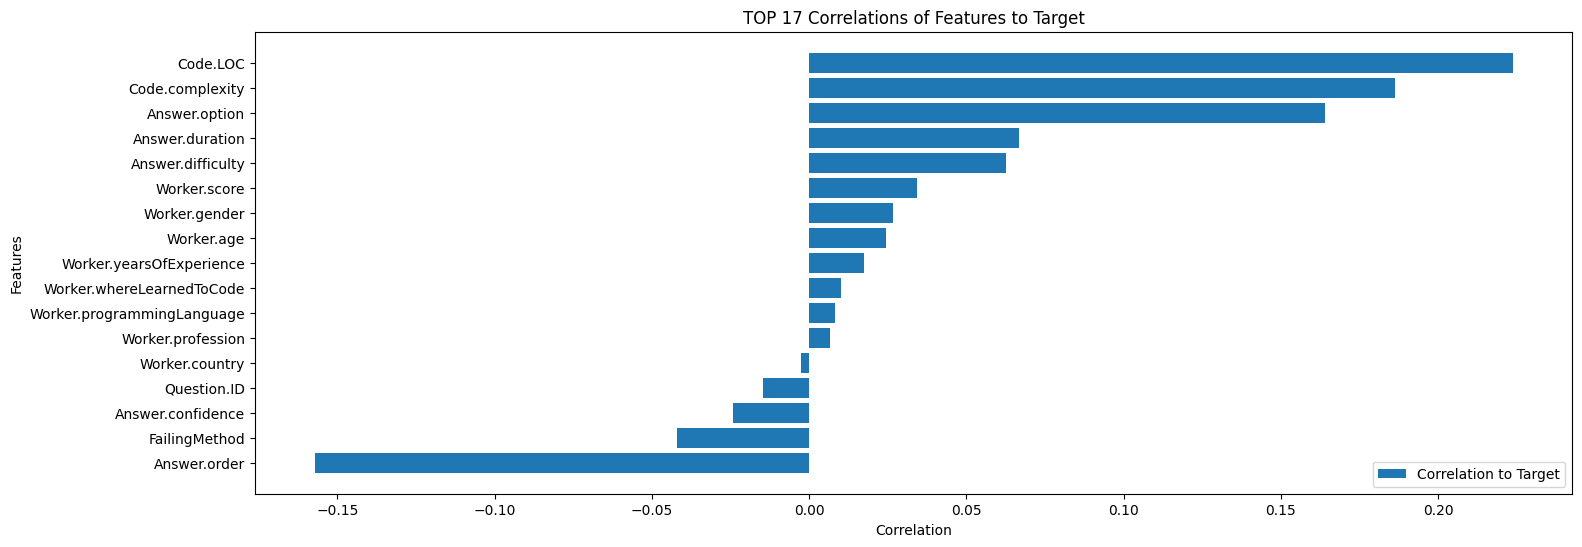

In [10]:
def plot_horizontal_bars(data, title, legend_label, x_label, y_label):
    amount_bars = len(data)
    _, ax = plt.subplots(figsize=(amount_bars, 6))

    ax.barh(data.index, data, label=legend_label)

    ax.set_title(title)
    ax.legend(loc="lower right")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

def calculate_top_correlations(X, y, amount_positive=10, amount_negative=7):
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    all_correlations = X.corrwith(y).sort_values(ascending=True).dropna()
    top_positive_correlations = all_correlations.tail(amount_positive)
    top_negative_correlations = all_correlations.head(amount_negative)
    combined_correlations = pd.concat([top_positive_correlations, top_negative_correlations]).sort_values(ascending=True)
    return combined_correlations

correlations = calculate_top_correlations(X_TO_EXPLAIN, Y_TO_EXPLAIN)
plot_horizontal_bars(data=correlations, 
                     title=f"TOP {len(correlations)} Correlations of Features to Target", 
                     legend_label="Correlation to Target", 
                     x_label="Correlation", 
                     y_label="Features")